In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Define filepath
iowa_data_path = '~/kaggle/input/iowa-housing-data/train.csv'

#Create dataframe
df = pd.read_csv(iowa_data_path)

In [5]:
# Exploratory data-analysis
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
# Checking corelation between columns
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [22]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd','GarageArea','PoolArea']
#['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [23]:
df[features].head

<bound method NDFrame.head of       LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        8450            7            5       2003          2003   
1        9600            6            8       1976          1976   
2       11250            7            5       2001          2002   
3        9550            7            5       1915          1970   
4       14260            8            5       2000          2000   
...       ...          ...          ...        ...           ...   
1455     7917            6            5       1999          2000   
1456    13175            6            6       1978          1988   
1457     9042            7            9       1941          2006   
1458     9717            5            6       1950          1996   
1459     9937            5            6       1965          1965   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageArea  PoolArea  YrSold  
0                3             1             8         548         0    20

In [24]:
X = df[features]
y = df.SalePrice

In [25]:
X

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PoolArea,YrSold
0,8450,7,5,2003,2003,3,1,8,548,0,2008
1,9600,6,8,1976,1976,3,1,6,460,0,2007
2,11250,7,5,2001,2002,3,1,6,608,0,2008
3,9550,7,5,1915,1970,3,1,7,642,0,2006
4,14260,8,5,2000,2000,4,1,9,836,0,2008
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,3,1,7,460,0,2007
1456,13175,6,6,1978,1988,3,1,7,500,0,2010
1457,9042,7,9,1941,2006,4,1,9,252,0,2010
1458,9717,5,6,1950,1996,2,1,5,240,0,2010


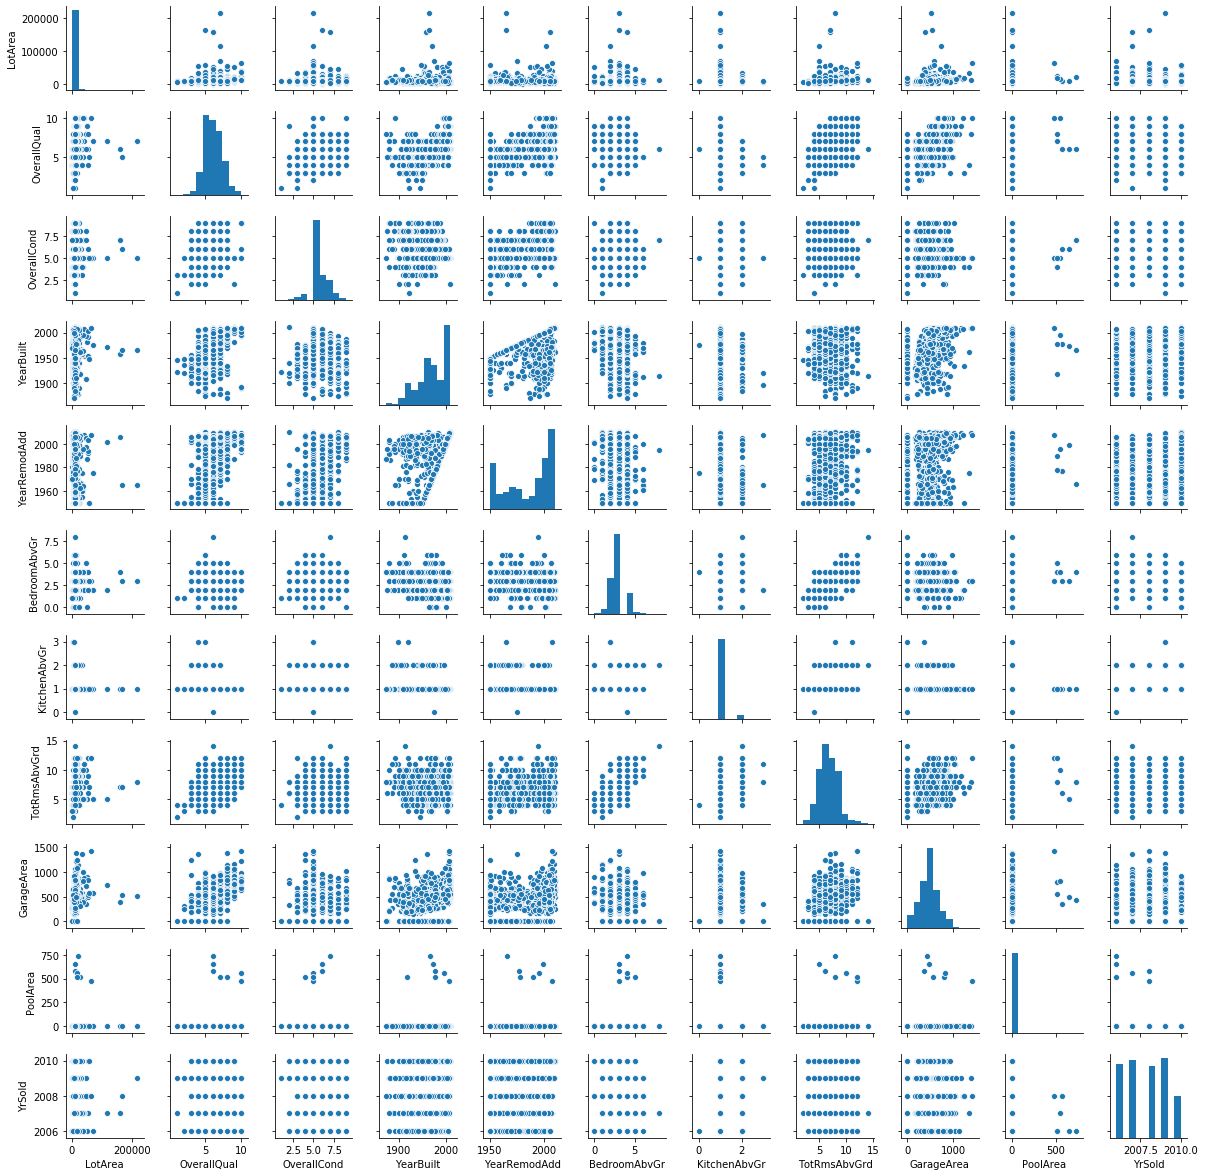

In [26]:
sns.pairplot(df[features], height=1.5)

In [27]:
# Split data
train_X, val_X, train_y, val_y = train_test_split(X,y)

In [28]:
train_X

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PoolArea,YrSold
251,4750,8,5,2006,2007,2,1,5,538,0,2007
739,9313,7,5,2004,2004,3,1,7,572,0,2009
756,10769,8,5,2007,2007,3,1,7,578,0,2009
639,3982,8,5,2006,2006,1,1,7,648,0,2006
1292,6600,5,4,1892,1965,4,2,11,432,0,2009
...,...,...,...,...,...,...,...,...,...,...,...
1040,13125,5,4,1957,2000,3,1,8,484,0,2006
5,14115,5,5,1993,1995,1,1,5,480,0,2009
277,19138,4,5,1951,1951,2,1,4,400,0,2010
521,11988,6,6,1957,1957,3,1,6,336,0,2007


In [29]:
train_y

251     235000
739     190000
756     212000
639     264561
1292    107500
         ...  
1040    155000
5       143000
277     141000
521     150000
117     155000
Name: SalePrice, Length: 1095, dtype: int64

In [56]:
# Create model
rf_model = RandomForestRegressor(random_state=1, max_leaf_nodes=100)
dt_model = DecisionTreeRegressor(random_state=1, max_leaf_nodes=100)

In [57]:
# Training Decision Tree
dt_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=100, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [58]:
# Training Random Forest Regressor
rf_model.fit(train_X, train_y)

/home/raxit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [59]:
# Prediction
# prediction using Random Forest
rf_model_pred_y = rf_model.predict(val_X)

# Prediction using Decisiontree
dt_model_pred_y = dt_model.predict(val_X)

In [60]:
# Evaluating Performance for Decision Tree
dt_mae = mean_absolute_error(val_y, dt_model_pred_y)
print("The mean absolute error for Decision Tree is: {}".format(dt_mae))

# Evaluating performance for Random forest regressor
rf_mae = mean_absolute_error(val_y, rf_model_pred_y)
print("The mean absolute error for Random Forest is: {}".format(rf_mae))

The mean absolute error for Decision Tree is: 30400.846843925363
The mean absolute error for Random Forest is: 24133.717067691246


In [62]:
## CPU-INTENSIVE, KEEP COMMENTED
## Finding optimal leaf_nodes for random forest regressor
#
#for max_leaf_nodes in range (10,500):
#   random_forest = RandomForestRegressor(max_leaf_nodes, random_state=1)
#    random_forest.fit(train_X, train_y)
#    pred_y = random_forest.predict(val_X)
#    mae = mean_absolute_error(pred_y, val_y)
#    if max_leaf_nodes == 10:
#        optimal_mae = mae
#        optmal_nodes = max_leaf_nodes
#    else:
#        if mae<optimal_mae :
#            optimal_mae = mae
#            optimal_nodes = max_leaf_nodes
#print("The optimal value of MAE for random forest is {} having {} nodes".format(optimal_mae, optimal_nodes))

The optimal value of MAE for random forest is 22759.040457094186 having 193 nodes


In [127]:
# Creating optimal RF model
rf_optimal_model = RandomForestRegressor(n_estimators=100, max_depth= None , max_leaf_nodes= 193, random_state=1)

In [128]:
rf_optimal_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=193,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [129]:
rf_optimal_pred_y = rf_optimal_model.predict(val_X)

In [130]:
least_mae = mean_absolute_error(rf_optimal_pred_y, val_y)
print("The MAE using optimal-RandomForestRegressor is {}".format(least_mae))

The MAE using optimal-RandomForestRegressor is 22919.581785834398


In [142]:
## CPU-INTENSIVE, KEEP COMMENTED
## Finding optimal leaf_nodes for decision tree regressor
#
#for max_leaf_nodes in range (10,500):
#   model = DecisionTreeRegressor(max_leaf_nodes, random_state=1)
#    model.fit(train_X, train_y)
#    pred_y = model.predict(val_X)
#    mae = mean_absolute_error(pred_y, val_y)
#    if max_leaf_nodes == 10:
#        optimal_mae = mae
#        optmal_nodes = max_leaf_nodes
#    else:
#        if mae<optimal_mae :
#            optimal_mae = mae
#            optimal_nodes = max_leaf_nodes
#print("The optimal value of MAE for decision tree is {} having {} nodes".format(optimal_mae, optimal_nodes))

In [143]:
# Creating optimal RF model
dt_optimal_model = DecisionTreeRegressor(max_depth= None , max_leaf_nodes= 193, random_state=1)

In [144]:
dt_optimal_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=193, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [145]:
dt_optimal_pred_y = dt_optimal_model.predict(val_X)

In [146]:
least_mae = mean_absolute_error(dt_optimal_pred_y, val_y)
print("The MAE using optimal-decisionTreeRegressor is {}".format(least_mae))

The MAE using optimal-decisionTreeRegressor is 33190.594725456984
